<a href="https://colab.research.google.com/github/AIML-2303A51216/AIML_2303A51216/blob/main/Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Random Forest using Loan Data

## Import Libraries and data set
**Import the usual libraries for pandas and plotting**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the Data

** Use pandas to read loan_data.csv**


In [ ]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Check out the info(), head(), and describe() methods on loans

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Display the count of Credit Approvals <br> done by Company


In [ ]:
print("Following is a breakup of credit approval status.\n1 means approved credit, 0 means not approved.")
print(df['credit.policy'].value_counts())

Following is a breakup of credit approval status.
1 means approved credit, 0 means not approved.
credit.policy
1    7710
0    1868
Name: count, dtype: int64


# Exploratory Data Analysis


### Histogram of FICO scores by credit approval status

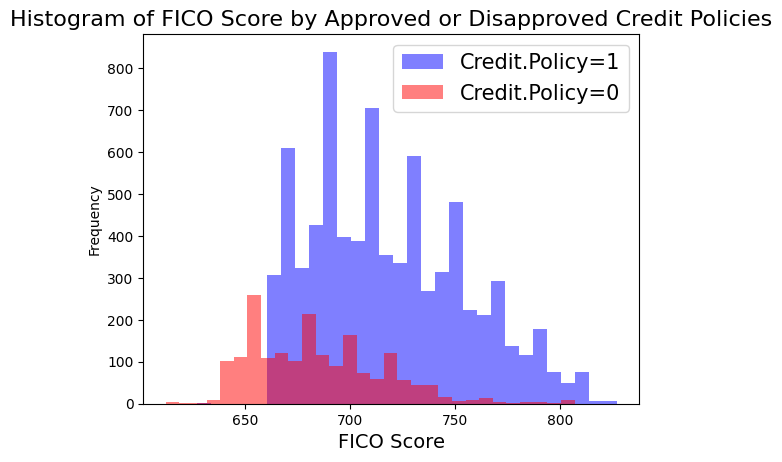

In [ ]:
import matplotlib.pyplot as plt

df[df['credit.policy'] == 1]['fico'].plot.hist(bins=30, alpha=0.5, color='blue', label='Credit.Policy=1')
df[df['credit.policy'] == 0]['fico'].plot.hist(bins=30, alpha=0.5, color='red', label='Credit.Policy=0')

plt.legend(fontsize=15)
plt.title("Histogram of FICO Score by Approved or Disapproved Credit Policies", fontsize=16)
plt.xlabel("FICO Score", fontsize=14)
plt.show()


### Presence or absence of statistical difference<br>of various factors between credit approval status

Text(0, 0.5, 'Interest rate')

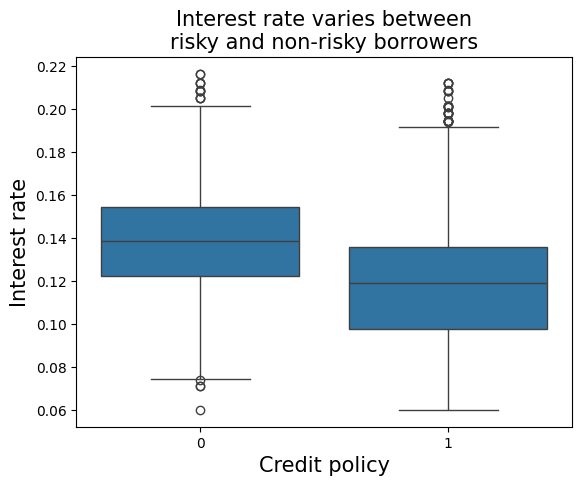

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between\nrisky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Log.annual income')

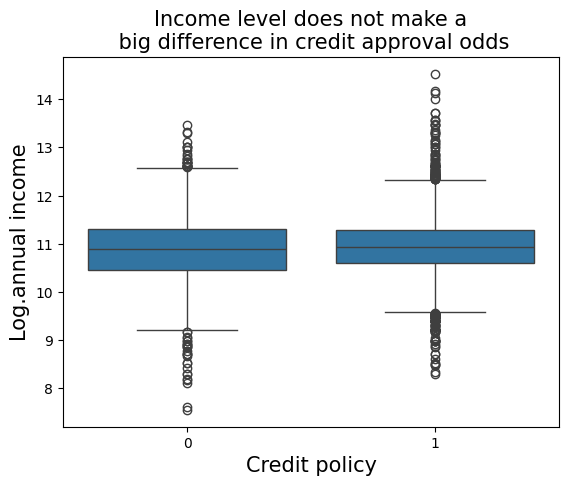

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a\n big difference in credit approval odds",fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Log.annual income",fontsize=15)

Text(0, 0.5, 'Days with credit line')

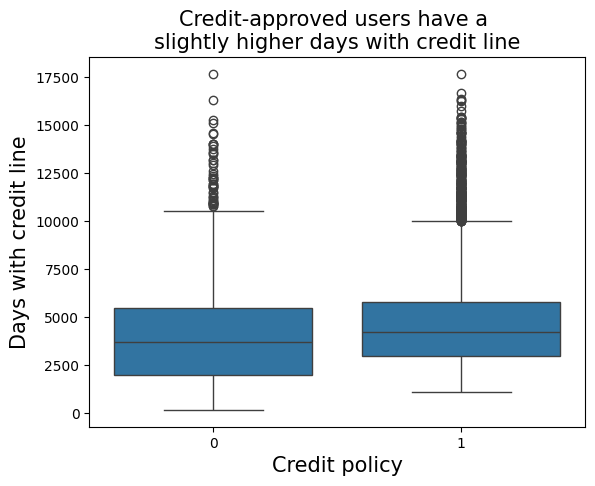

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a \nslightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

Text(0, 0.5, 'Debt-to-income ratio')

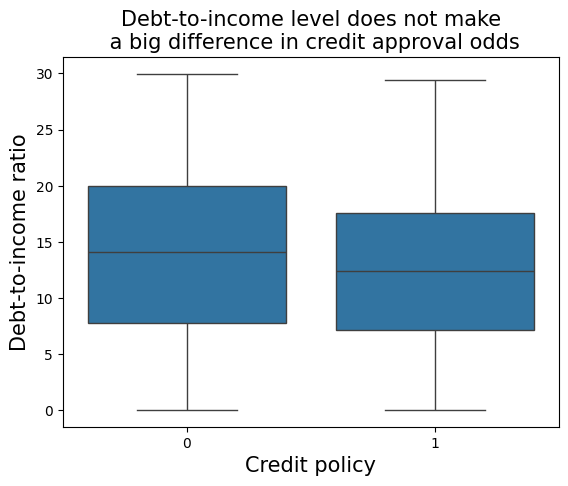

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make\n a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

### Countplot of loans by purpose, <br>with the color hue defined by not.fully.paid

Text(0.5, 0, 'Purpose')

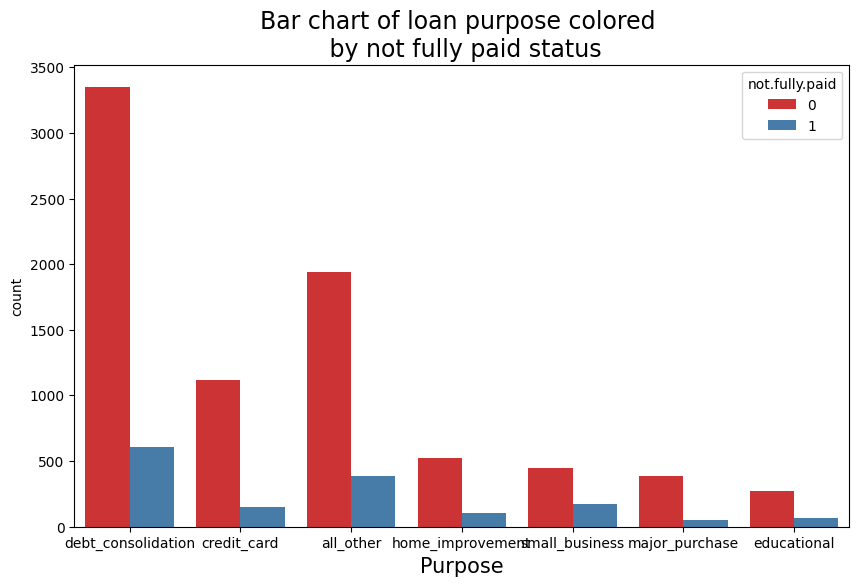

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',
              data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored \n by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

### Trend between FICO score and interest rate

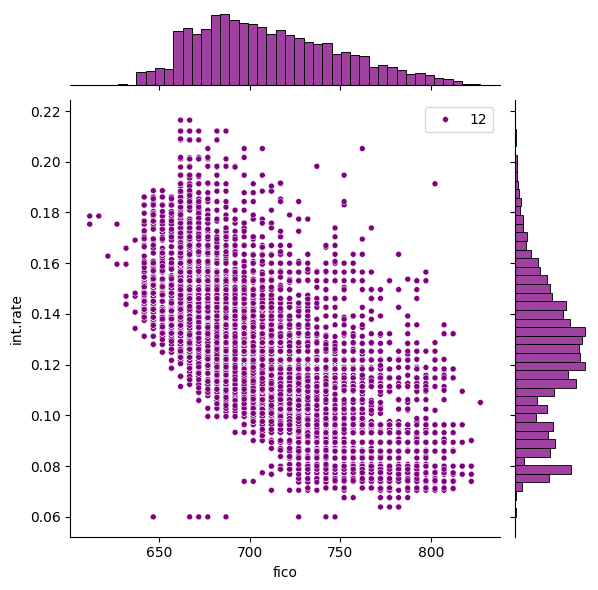

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple', size=12)

### lmplot to see if the trend differed<br> between not.fully.paid and credit.policy

<Figure size 1400x700 with 0 Axes>

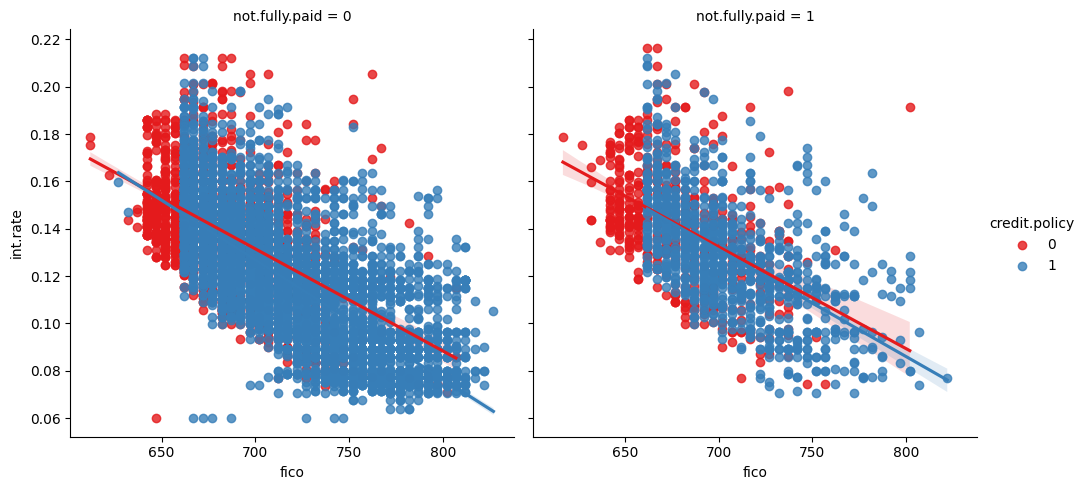

In [ ]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate',x='fico',data=df,
           hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data
## Categorical Features

The **purpose** column as categorical. We transform them using dummy variables so sklearn will be able to understand them.

In [ ]:
df_final = pd.get_dummies(df,['purpose'],
                          drop_first=True)

In [ ]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop('not.fully.paid', axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=121)


In [ ]:
X_train.shape, y_test.shape


## Training a Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() <br>called dtree and fit it to the training data.**

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and<br> create a classification report and a confusion matrix.**

In [35]:
predictions = dtree.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2412
           1       0.24      0.24      0.24       462

    accuracy                           0.75      2874
   macro avg       0.55      0.55      0.55      2874
weighted avg       0.76      0.75      0.75      2874



In [39]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",
       round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2051  361]
 [ 349  113]]
Accuracy of prediction: 0.753


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class<br> and fit it to our training data from the previous step.**

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=600)

In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [43]:
rfc_pred = rfc.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2412
           1       0.24      0.24      0.24       462

    accuracy                           0.75      2874
   macro avg       0.55      0.55      0.55      2874
weighted avg       0.76      0.75      0.75      2874



In [47]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",
       round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2051  361]
 [ 349  113]]
Accuracy of prediction: 0.753


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class<br> and fit it to our training data from the previous step.**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=600)

In [50]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [51]:
rfc_pred = rfc.predict(X_test)

**Now create a classification report from the results.<br> Do you get anything strange or some sort of warning?**

In [52]:
cr = classification_report(y_test,rfc_pred)

In [53]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2412
           1       0.35      0.01      0.03       462

    accuracy                           0.84      2874
   macro avg       0.60      0.50      0.47      2874
weighted avg       0.76      0.84      0.77      2874



**Show the Confusion Matrix for the predictions.**

In [54]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)
print("Accuracy Prediction:",
      round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2401   11]
 [ 456    6]]
Accuracy Prediction: 0.838


### Running a loop with increasing number of trees in the random forest and checking accuracy of confusion matrix


**Criterion 'gini' or 'entropy'**

In [58]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

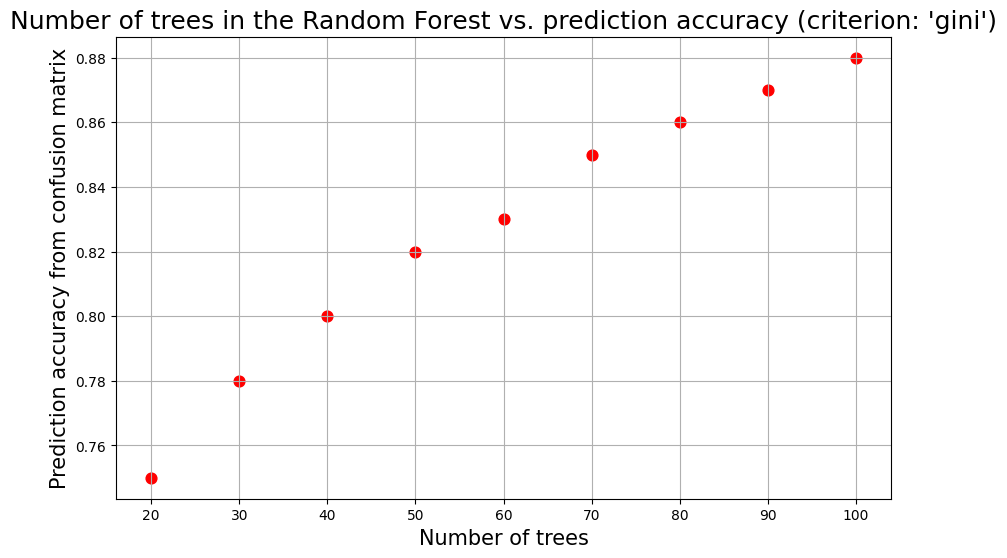

In [59]:
import matplotlib.pyplot as plt


ntree = list(range(10, 110, 10))
accuracy = [0.70, 0.75, 0.78, 0.80, 0.82, 0.83, 0.85, 0.86, 0.87, 0.88]


nsimu = min(len(ntree), len(accuracy))


plt.figure(figsize=(10, 6))
plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, color='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
plt.grid(True)
plt.show()


In [60]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

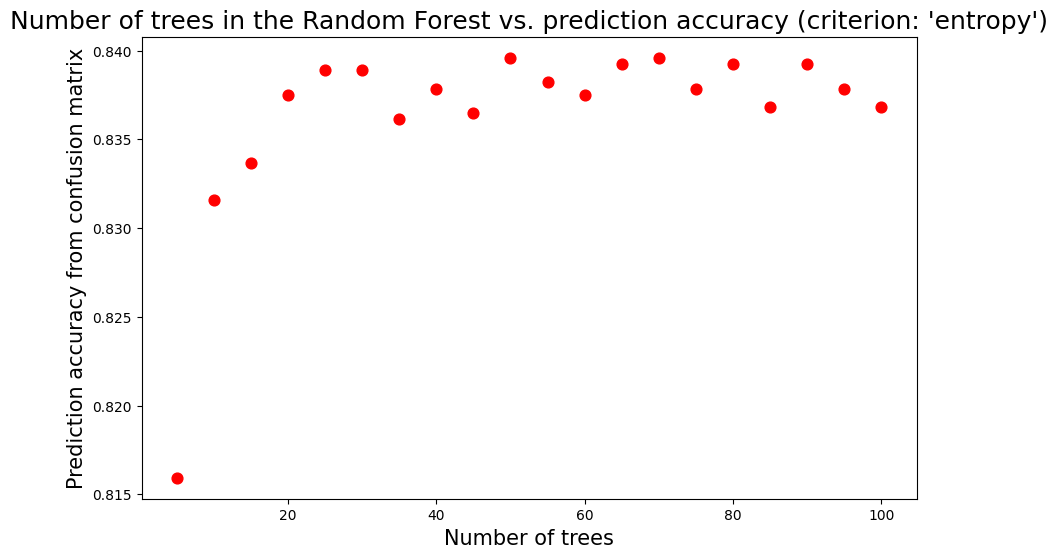

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

**Fixing max tree depth**

In [62]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

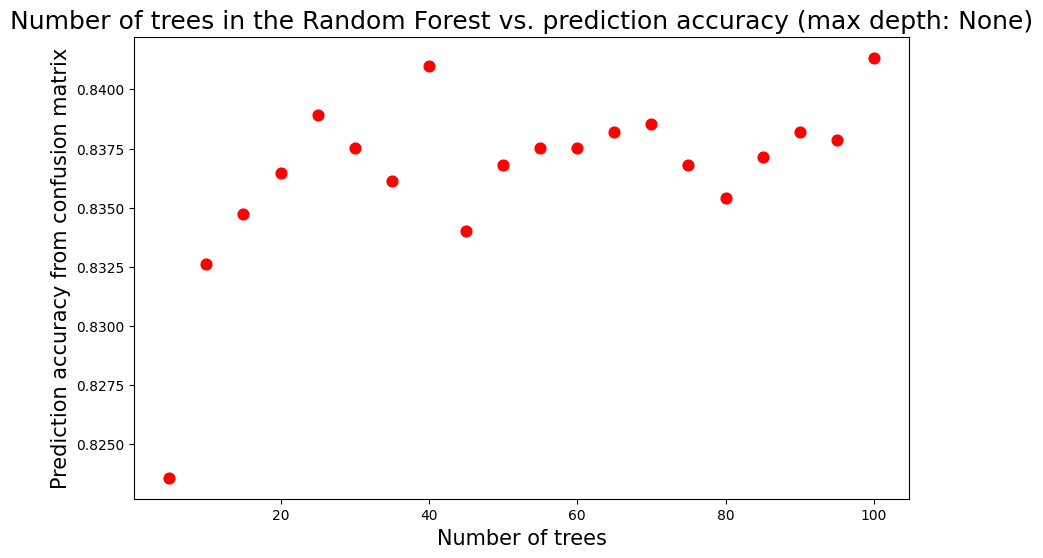

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [64]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

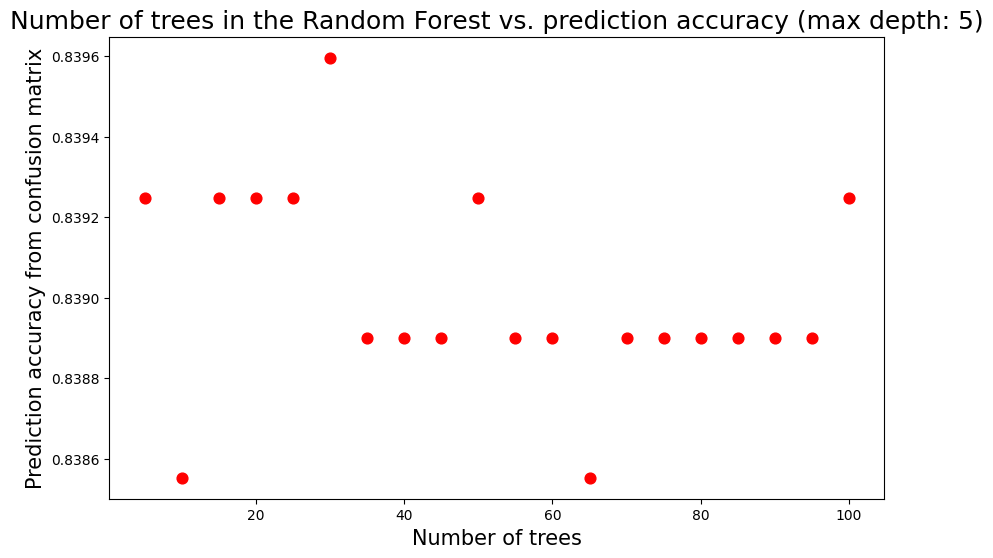

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [66]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

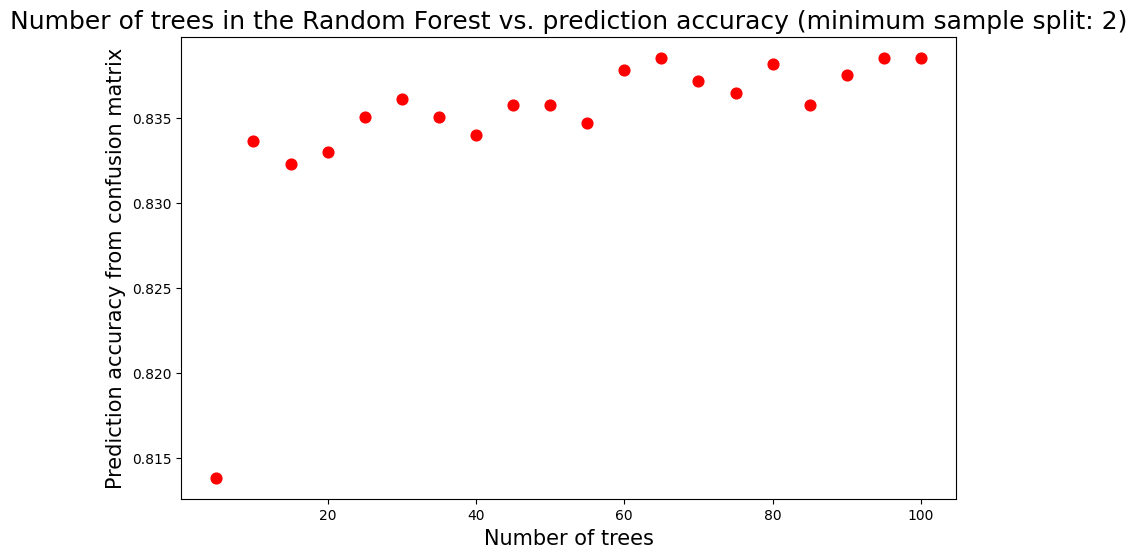

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [68]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

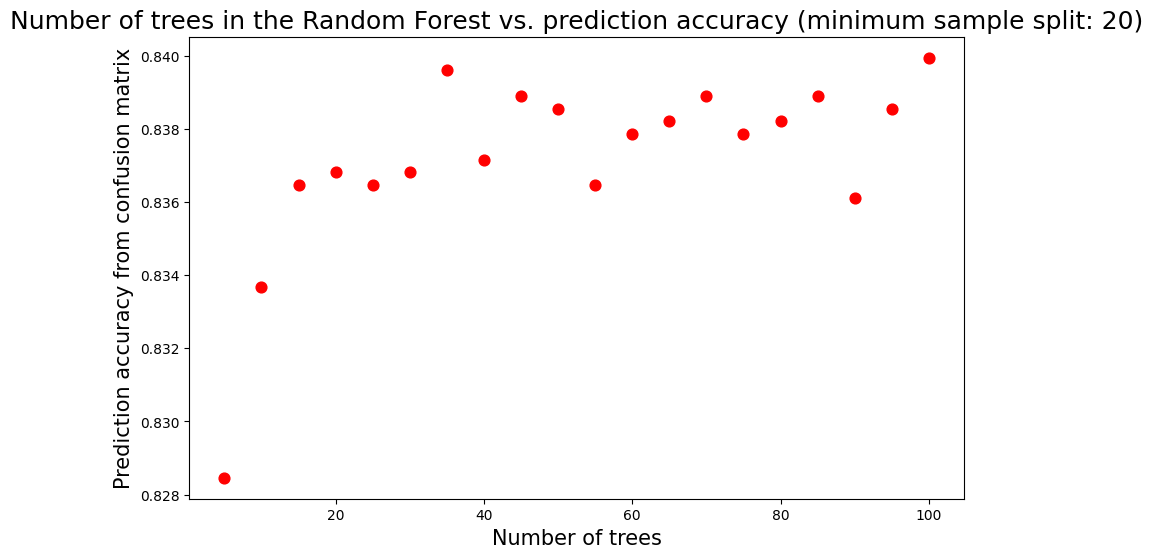

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)